# A/B Testing: Promotion Effectiveness

## What I Did
- Defined control and treatment groups
- Conducted A/B testing on promotional impact
- Interpreted results using statistical significance


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics

In [5]:
data=pd.read_csv("Documents/ML_Competetion/Python Project/Sales project 1/data.csv")
data.head()

,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,...,duration_hours,revenue,has_promo,order_date,order_month,order_week,order_day_of_week,is_repeat_customer,session_engaged,shepping_fee_ratio
0,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676,-8.227893,...,NaN,191247,1,2018-07-29,2018-07,2018-07-23/2018-07-29,Sunday,0,1,0.052288
1,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,No promo code,10000,2018-08-03 01:29:03.415705,3.013470,...,NaN,145526,0,2018-07-30,2018-07,2018-07-30/2018-08-05,Monday,0,1,0.068716
2,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,No promo code,10000,2018-09-18 08:41:49.422380,-2.579428,...,NaN,540696,0,2018-09-15,2018-09,2018-09-10/2018-09-16,Saturday,1,1,0.018495
3,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,No promo code,0,2018-11-05 17:42:27.954235,-3.602334,...,NaN,271012,0,2018-11-01,2018-11,2018-10-29/2018-11-04,Thursday,1,1,0.000000
4,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,No promo code,0,2018-12-23 17:24:07.361785,-3.602334,...,NaN,198753,0,2018-12-18,2018-12,2018-12-17/2018-12-23,Tuesday,1,1,0.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 50 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             852584 non-null  int64  
 1   booking_id              852584 non-null  object 
 2   session_id              852584 non-null  object 
 3   payment_method          852584 non-null  object 
 4   payment_status          852584 non-null  object 
 5   promo_amount            852584 non-null  int64  
 6   promo_code              852584 non-null  object 
 7   shipment_fee            852584 non-null  int64  
 8   shipment_date_limit     852584 non-null  object 
 9   shipment_location_lat   852584 non-null  float64
 10  shipment_location_long  852584 non-null  float64
 11  total_amount            852584 non-null  int64  
 12  product_id              852584 non-null  int64  
 13  quantity                852584 non-null  int64  
 14  item_price          

In [7]:
data.isnull().sum()

customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                     0
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
gender_x                       0
device_type                    0
home_location_lat              0
home_location_long             0
home_location                  0
home_country                   0
first_join_date                0
first_join_date                0
full_name                      0
age                            0
id                           460
gender_y                     460
masterCategory               460
subCategory                  460
articleType                  460
baseColour

In [8]:
data['has_promo'].value_counts(normalize=True)

has_promo
0    0.617004
1    0.382996
Name: proportion, dtype: float64

In [9]:
data.groupby('has_promo')[['revenue','quantity']].median()

,revenue,quantity
has_promo,,
0,259300.0,1.0
1,259090.5,1.0


In [25]:
from scipy.stats import mannwhitneyu 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

In [13]:
control=data[data['has_promo']==0]['revenue']
treatment=data[data['has_promo']==1]['revenue']
ustat,pvalue=mannwhitneyu(control,treatment,alternative='two-sided')
ustat,pvalue

(np.float64(85954430077.0), np.float64(0.54044379028641))

In [14]:
n1=len(control)
n2=len(treatment)
rank_biserial=1-(2*ustat)/(n1*n2)
rank_biserial

np.float64(-0.000787376048126065)

In [15]:
data.groupby(['has_promo','is_repeat_customer'])['revenue'].median()

has_promo  is_repeat_customer
0          0                     259484.0
           1                     259291.0
1          0                     259646.5
           1                     259042.0
Name: revenue, dtype: float64

In [19]:
treatment='has_promo'
covariates=['age','quantity','is_repeat_customer','duration_days','shipment_fee']
X=data[covariates].fillna(0)
y=data[treatment]
ps_model=LogisticRegression(max_iter=1000)
ps_model.fit(X,y)
data['propensity_score']=ps_model.predict_proba(X)[:,1]

In [23]:
ps_model.predict_proba(X)

array([[0.63977979, 0.36022021],
       [0.64133422, 0.35866578],
       [0.61912898, 0.38087102],
       ...,
       [0.64294211, 0.35705789],
       [0.63763324, 0.36236676],
       [0.63861205, 0.36138795]])

In [29]:
treated=data[data['has_promo']==1]
control=data[data['has_promo']==0]
nn=NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distance,indices=nn.kneighbors(treated[['propensity_score']])
matched_control=control.iloc[indices.flatten()]

In [32]:
ate = (
    treated["revenue"].reset_index(drop=True) -
    matched_control["revenue"].reset_index(drop=True)
).median()

ate


4302.5

In [31]:
print(distance.mean())

4.1556850136399443e-07


In [33]:
daily_metrics=(data.groupby(['order_date','has_promo'])['revenue'].median().reset_index())

In [38]:
daily_metrics.head()

,order_date,has_promo,revenue
0,2016-06-30,0,630795.0
1,2016-07-01,0,282731.0
2,2016-07-01,1,163539.0
3,2016-07-02,0,299345.0
4,2016-07-02,1,222001.0


In [35]:
pivot=daily_metrics.pivot(
    index='order_date',
    columns='has_promo',
    values='revenue'
)

In [39]:
pivot.head()

has_promo,0,1,cummulative_lift
order_date,,,
2016-06-30,630795.0,NaN,NaN
2016-07-01,282731.0,163539.0,-749987.0
2016-07-02,299345.0,222001.0,-827331.0
2016-07-03,607017.0,182952.5,-1251395.5
2016-07-04,279698.5,319693.0,-1211401.0


In [37]:
pivot['cummulative_lift']=(
    pivot[1].cumsum()-pivot[0].cumsum() )
    

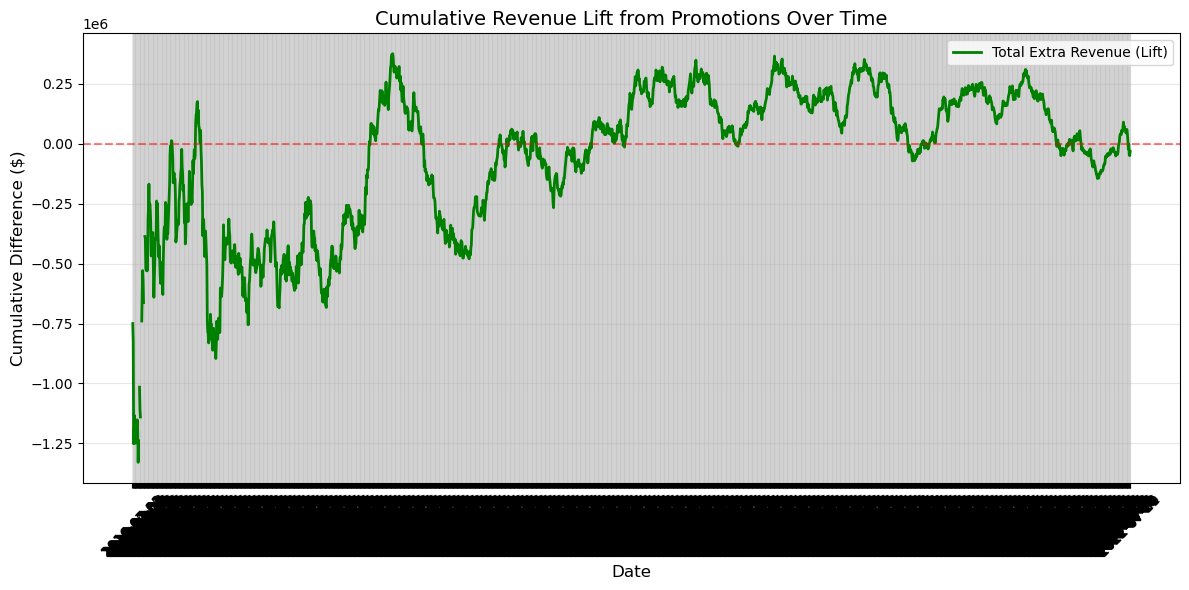

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.plot(pivot.index, pivot['cummulative_lift'], color='green', linewidth=2, label='Total Extra Revenue (Lift)')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.title('Cumulative Revenue Lift from Promotions Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Difference ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
baseline_mean = data[data["has_promo"]==0]["revenue"].mean()
baseline_std = data[data["has_promo"]==0]["revenue"].std()


In [43]:
from statsmodels.stats.power import TTestIndPower

effect_size = 0.1 
power = 0.8
alpha = 0.05

analysis = TTestIndPower()
sample_size = analysis.solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha
)

sample_size


1570.7330430520024

In [44]:
mde = analysis.solve_power(
    nobs1=len(control),
    power=power,
    alpha=alpha
)

mde


0.0054626562671819655